In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter
print ("Import successfull!")

Import successfull!


In [2]:
pd.read_excel('C:/Users/fmcna/OneDrive/Desktop/Masters/Semester2/Data Science & Big Data Analytics//merged-data-COMBINED.xlsx')

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.960000,10,14,239,2,Grocery Food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
1,1098000980,2013-03-30,800220505783,2,1.960000,10,14,239,2,Grocery Food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
2,1102258535,2013-04-12,800220505783,3,2.940015,10,14,239,2,Grocery Food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
3,1103084867,2013-04-15,520423907421,2,0.580015,10,14,239,2,Grocery Food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.580015,10,14,239,2,Grocery Food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142300,1094755771,2013-03-20,763890024835,1,2.749993,40,30,304,2,hardware,batteries,ALKALINE,0,NaN,NaN,NaN,NaN,NaN
142301,1103502337,2013-04-16,360923242190,1,12.000000,60,60,767,2,shoes,boys,Trainers BOY,0,NaN,NaN,NaN,NaN,NaN
142302,1101859908,2013-04-11,871764411542,1,13.500014,10,12,281,1,Detergents,laundry,wash,0,NaN,NaN,NaN,NaN,NaN
142303,1108704703,2013-05-01,400580823684,1,6.450007,10,12,286,2,Detergents,beauty products,body care,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_excel('C:/Users/fmcna/OneDrive/Desktop/Masters/Semester2/Data Science & Big Data Analytics//merged-data-COMBINED.xlsx')

In [4]:
import pandas as pd

basket_totals = df.groupby('Basket_ID').agg({
    'Sum_Value': 'sum', 
    'Sum_Units': 'sum', 
    'Card_ID': 'first', 
    'Age':'first',
    'Gender':'first',
    'MaritalStatus':'first',
    'HouseholdSize':'first',
    'Children':'first',
    'Date' : 'first',
    'CategoryDDescription' : lambda x: '|'.join(x)
    }).reset_index()


loyalty_baskets = basket_totals[basket_totals['Card_ID'].notnull()]
non_loyalty_baskets = basket_totals[basket_totals['Card_ID'].isnull()]

basket_frequencies = loyalty_baskets.groupby(['Card_ID', 'Basket_ID']).size().reset_index(name='Basket_Frequency')
loyalty_baskets = pd.merge(loyalty_baskets, basket_frequencies.groupby('Card_ID')['Basket_Frequency'].count().reset_index(name='Basket_Frequency'), on='Card_ID')

In [5]:
# print the results
loyalty_baskets

,Basket_ID,Sum_Value,Sum_Units,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children,Date,CategoryDDescription,Basket_Frequency
0,1089674689,3.590022,6,9160002070041,61.0,Male,None,3.0,NaN,2013-03-04,fresh milk |kitcher roll|salt|cinamon,11
1,1093497639,16.221247,7,9160002070041,61.0,Male,None,3.0,NaN,2013-03-15,SHAMPOO|soft cheese |fresh milk |pickle|white ...,11
2,1094397183,8.040029,5,9160002070041,61.0,Male,None,3.0,NaN,2013-03-19,fresh milk |dishwasher|greek coffe,11
3,1097158750,5.611592,4,9160002070041,61.0,Male,None,3.0,NaN,2013-03-28,soft cheese |fresh milk |pasta|white cheese,11
4,1101829337,6.078738,5,9160002070041,61.0,Male,None,3.0,NaN,2013-04-11,LIMITED DURATION|fresh milk |poultry|BANANAS|w...,11
...,...,...,...,...,...,...,...,...,...,...,...,...
32634,1109174239,10.690007,2,9162002760090,53.0,Female,Married,4.0,NaN,2013-05-02,familly |SPECIAL COOKING POOLS,1
32635,1109174332,45.052502,4,9164005404629,71.0,Male,None,1.0,0.0,2013-05-02,TOMATOES|POTATOES|PEARS|kid,1
32636,1109174351,3.000000,10,9162007522594,43.0,Female,None,1.0,0.0,2013-05-02,wafers,1
32637,1109175661,9.860044,6,9164009691230,39.0,Female,None,3.0,2.0,2013-05-02,tea|mushrooms |shower gels|sour cream|easter,1


In [46]:
#Creating dummy variables for columns categorical data
pd.get_dummies(df['MaritalStatus'])

,0,Divorced,Married,Single (Alone),Single (Family),Widow/Widower
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
142300,1,0,0,0,0,0
142301,1,0,0,0,0,0
142302,1,0,0,0,0,0
142303,1,0,0,0,0,0


In [47]:
pd.get_dummies(df['Gender'])

,0,Female,Male,Unknown
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
142300,1,0,0,0
142301,1,0,0,0
142302,1,0,0,0
142303,1,0,0,0


In [48]:
pd.get_dummies(df, columns=['MaritalStatus','Gender',], drop_first=True)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,...,HouseholdSize,Children,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single (Alone),MaritalStatus_Single (Family),MaritalStatus_Widow/Widower,Gender_Female,Gender_Male,Gender_Unknown
0,1103084867,2013-04-15,800220505783,2,1.960000,10,14,239,2,Grocery Food,...,2.0,0.0,0,0,0,0,0,1,0,0
1,1098000980,2013-03-30,800220505783,2,1.960000,10,14,239,2,Grocery Food,...,3.0,0.0,0,0,0,0,0,0,1,0
2,1102258535,2013-04-12,800220505783,3,2.940015,10,14,239,2,Grocery Food,...,3.0,0.0,0,0,0,0,0,0,1,0
3,1103084867,2013-04-15,520423907421,2,0.580015,10,14,239,2,Grocery Food,...,2.0,0.0,0,0,0,0,0,1,0,0
4,1097579428,2013-03-29,520423907421,2,0.580015,10,14,239,2,Grocery Food,...,3.0,2.0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142300,1094755771,2013-03-20,763890024835,1,2.749993,40,30,304,2,hardware,...,0.0,0.0,0,0,0,0,0,0,0,0
142301,1103502337,2013-04-16,360923242190,1,12.000000,60,60,767,2,shoes,...,0.0,0.0,0,0,0,0,0,0,0,0
142302,1101859908,2013-04-11,871764411542,1,13.500014,10,12,281,1,Detergents,...,0.0,0.0,0,0,0,0,0,0,0,0
142303,1108704703,2013-05-01,400580823684,1,6.450007,10,12,286,2,Detergents,...,0.0,0.0,0,0,0,0,0,0,0,0


In [50]:
dummy_df = pd.get_dummies(df, columns=['MaritalStatus','Gender',], drop_first=True) 
df.fillna(0, inplace=True)

In [51]:
dummy_df.corr().round(2)

,Basket_ID,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,Card_ID,Age,HouseholdSize,Children,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single (Alone),MaritalStatus_Single (Family),MaritalStatus_Widow/Widower,Gender_Female,Gender_Male,Gender_Unknown
Basket_ID,1.00,-0.01,-0.01,0.05,0.00,-0.00,0.03,0.01,0.01,0.02,0.01,0.01,-0.01,-0.01,0.02,0.01,0.01,0.02,-0.00,0.00
Barcode,-0.01,1.00,0.11,-0.07,-0.15,-0.69,0.12,-0.08,-0.04,-0.05,-0.02,-0.01,0.00,-0.01,0.01,0.01,0.01,-0.02,-0.03,-0.00
Sum_Units,-0.01,0.11,1.00,0.14,-0.03,-0.14,-0.02,-0.03,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,0.01,-0.00,0.00,-0.02,0.01,0.02
Sum_Value,0.05,-0.07,0.14,1.00,0.10,0.12,0.02,-0.00,0.02,0.03,0.01,-0.00,-0.00,0.00,0.01,-0.01,0.00,-0.00,0.04,0.00
CategoryA,0.00,-0.15,-0.03,0.10,1.00,0.48,-0.31,0.20,0.00,0.01,-0.00,-0.00,0.01,-0.01,-0.01,0.00,0.00,-0.00,0.01,0.00
CategoryB,-0.00,-0.69,-0.14,0.12,0.48,1.00,-0.13,0.19,0.03,0.05,0.02,0.00,-0.00,0.00,-0.01,-0.00,-0.01,0.02,0.03,-0.00
CategoryC,0.03,0.12,-0.02,0.02,-0.31,-0.13,1.00,0.16,-0.02,-0.02,-0.01,0.00,-0.01,0.00,0.01,-0.00,-0.00,-0.01,-0.02,-0.01
CategoryD,0.01,-0.08,-0.03,-0.00,0.20,0.19,0.16,1.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.01,-0.00
Card_ID,0.01,-0.04,-0.01,0.02,0.00,0.03,-0.02,-0.01,1.00,0.93,0.76,0.46,0.04,0.41,0.17,0.08,0.03,0.73,0.45,0.14
Age,0.02,-0.05,-0.01,0.03,0.01,0.05,-0.02,-0.01,0.93,1.00,0.69,0.39,0.05,0.41,0.13,0.04,0.04,0.66,0.45,0.10


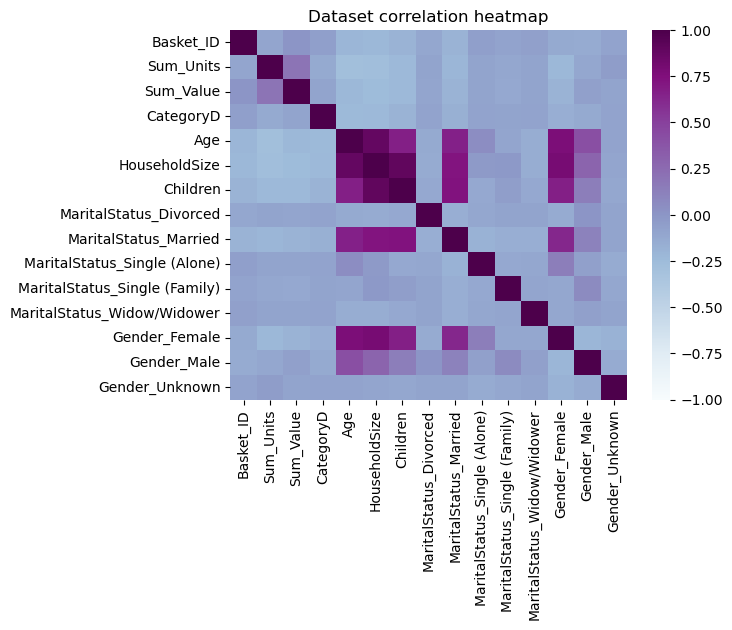

In [52]:
dummy_df = dummy_df.drop(['Barcode','CategoryA','CategoryB','CategoryC','Card_ID'],axis = 1).corr()
sns.heatmap(dummy_df.corr().round(2), vmin=-1, vmax=1, center=0, cmap ='BuPu', fmt = 'g')

#Naming and plotting the heatmap
plt.title('Dataset correlation heatmap')
plt.show()

In [17]:

loyalty_baskets['Date'] = pd.to_datetime(loyalty_baskets['Date'])

last_purchase_date = loyalty_baskets.groupby('Card_ID')['Date'].max().reset_index(name='LastPurchaseDate')

loyalty_baskets = pd.merge(loyalty_baskets, last_purchase_date[['Card_ID', ]], on='Card_ID', how='left')


march_customers = set(loyalty_baskets[loyalty_baskets['Date'] < '2013-04-01']['Card_ID'].unique())


apr_may_customers = set(loyalty_baskets[loyalty_baskets['Date'] >= '2013-04-01']['Card_ID'].unique())


churned_customers = march_customers.difference(apr_may_customers)
churned_percent = len(churned_customers) / len(march_customers) * 100

print(f"Churned customer percentage: {churned_percent:.2f}%")

churned_customers_df = pd.DataFrame(list(churned_customers), columns = ['Card_ID'])
churned_customers_data = pd.merge(loyalty_baskets, churned_customers_df, on='Card_ID')

Churned customer percentage: 28.54%


In [27]:
print(churned_customers_data)

                  Basket_ID  Sum_Value  Sum_Units   Card_ID       Age  \
Basket_ID          1.000000   0.076242   0.042349 -0.046178  0.107721   
Sum_Value          0.076242   1.000000   0.707705 -0.001103  0.009176   
Sum_Units          0.042349   0.707705   1.000000 -0.007102 -0.049677   
Card_ID           -0.046178  -0.001103  -0.007102  1.000000 -0.016876   
Age                0.107721   0.009176  -0.049677 -0.016876  1.000000   
HouseholdSize     -0.001529   0.066831   0.098745 -0.088565 -0.044399   
Children          -0.040505   0.032335   0.076271 -0.083979 -0.018222   
Basket_Frequency   0.010494   0.034669   0.112451  0.019427 -0.017299   

                  HouseholdSize  Children  Basket_Frequency  
Basket_ID             -0.001529 -0.040505          0.010494  
Sum_Value              0.066831  0.032335          0.034669  
Sum_Units              0.098745  0.076271          0.112451  
Card_ID               -0.088565 -0.083979          0.019427  
Age                   -0.044399 

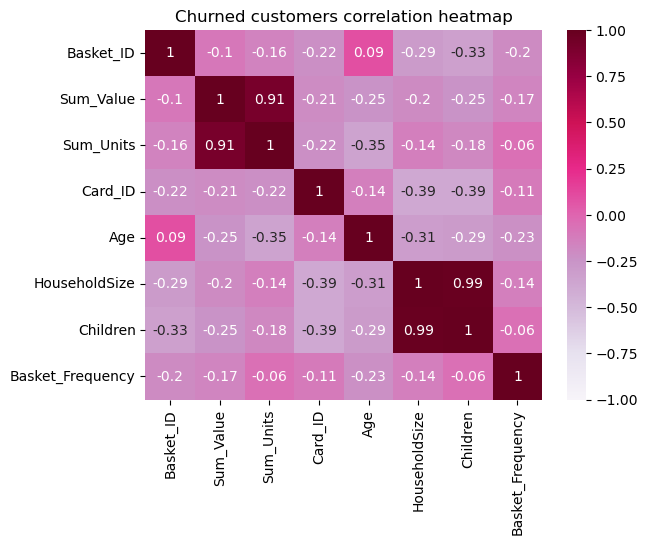

In [31]:
sns.heatmap(churned_customers_data.corr().round(2), annot=True,vmin=-1, vmax=1, center=0, cmap ='PuRd', fmt = 'g')

#Naming and plotting the heatmap
plt.title('Churned customers correlation heatmap')
plt.show()